# 1. Network Construction & Initial Validation

This notebook covers the first steps of the simulation plan: loading the synthetic data, constructing the social network graph using `networkx`, and performing a basic structural validation to ensure the graph is well-formed.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_rows = 10

## Load Datasets

In [2]:
STUDENTS_PATH = "../data/students.csv"
EDGES_PATH = "../data/edges.csv"

try:
    students_df = pd.read_csv(STUDENTS_PATH)
    edges_df = pd.read_csv(EDGES_PATH)
    print("Successfully loaded datasets.")
except FileNotFoundError as e:
    print(f"Error: {e}. Make sure you have run the data generation script first.")

Successfully loaded datasets.


In [3]:
students_df.head()

,id,hostel,batch,dept,clubs,friend_degree_proxy,online_reach_proxy,baseline_turnout_propensity,slander_susceptibility,skepticism,micro_community
0,s_f3560be4,Shankar,2022,CS,"['Literature', 'Music']",0,0,0.120838,0.106976,0.417944,Malviya_EEE
1,s_29b134d2,Ram,2023,EEE,['Drama'],0,0,0.477030,0.376599,0.625167,Gandhi_CS
2,s_d6f85434,VK,2025,CHEM,"['Music', 'Literature', 'Debate']",0,0,0.298996,0.870772,0.638572,Gandhi_CHEM
3,s_1964e81d,Budh,2022,MECH,"['Sports', 'Finance']",0,0,0.442543,0.619186,0.659513,VK_MATH
4,s_082a5e3b,Budh,2023,EEE,[],0,0,0.404606,0.522239,0.237181,Vyas_ENI


In [4]:
edges_df.head()

,source,target,layer,weight
0,s_f3560be4,s_29610ec3,friendship,0.847960
1,s_29b134d2,s_0083a5ee,friendship,0.513807
2,s_29b134d2,s_de81f4e2,friendship,0.265109
3,s_29b134d2,s_587d1aa2,friendship,0.578895
4,s_29b134d2,s_c80a81b8,friendship,0.631099


## Construct the Graph

In [5]:
G = nx.Graph()

# Add nodes with attributes from the students dataframe
for index, row in students_df.iterrows():
    node_id = row['id']
    attributes = row.to_dict()
    G.add_node(node_id, **attributes)

# Add edges with attributes from the edges dataframe
for index, row in edges_df.iterrows():
    G.add_edge(row['source'], row['target'], layer=row['layer'], weight=row['weight'])

## Structural Validation

In [6]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Graph constructed successfully.")
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Graph constructed successfully.
Number of nodes: 2000
Number of edges: 244670


### Degree Distribution

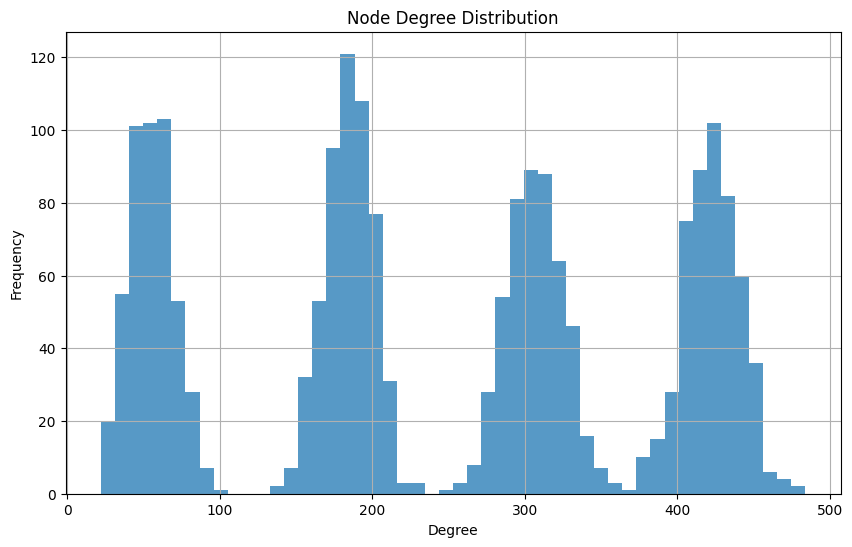

In [7]:
degrees = [G.degree(n) for n in G.nodes()]

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50, alpha=0.75)
plt.title("Node Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### Clustering Coefficient

In [8]:
# This can be slow for large graphs. We can sample if needed.
avg_clustering = nx.average_clustering(G)

print(f"Average Clustering Coefficient: {avg_clustering:.4f}")

Average Clustering Coefficient: 0.2540


### Connected Components

In [9]:
num_components = nx.number_connected_components(G)
print(f"Number of connected components: {num_components}")

if num_components > 1:
    largest_component = max(nx.connected_components(G), key=len)
    print(f"Size of largest component: {len(largest_component)} nodes")

Number of connected components: 1


### Multi-Layer Network Analysis

In [10]:
layer_counts = edges_df['layer'].value_counts()
print("Edge Counts per Layer:")
print(layer_counts)

Edge Counts per Layer:
layer
club          204280
friendship     41323
residence       8775
academic        5455
Name: count, dtype: int64


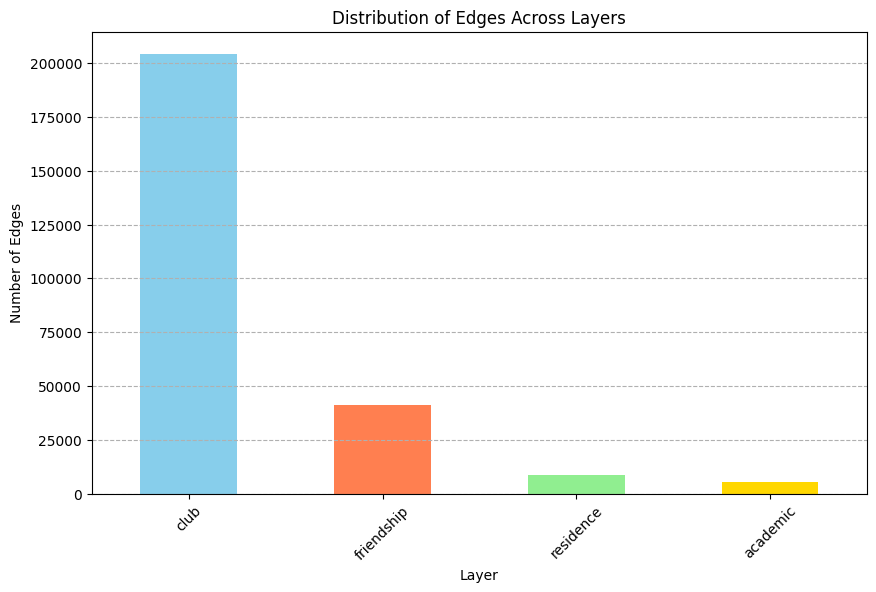

In [11]:
plt.figure(figsize=(10, 6))
layer_counts.plot(kind='bar', color=['skyblue', 'coral', 'lightgreen', 'gold'])
plt.title('Distribution of Edges Across Layers')
plt.xlabel('Layer')
plt.ylabel('Number of Edges')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

### Average Degree per Layer

In [12]:
for layer in edges_df['layer'].unique():
    layer_edges = [(u, v) for u, v, d in G.edges(data=True) if d['layer'] == layer]
    subgraph = nx.Graph(layer_edges)
    if subgraph.number_of_nodes() > 0:
        avg_degree = sum(dict(subgraph.degree()).values()) / subgraph.number_of_nodes()
        print(f"Average degree for layer '{layer}': {avg_degree:.2f}")

Average degree for layer 'friendship': 36.70
Average degree for layer 'residence': 12.36


Average degree for layer 'academic': 4.96


Average degree for layer 'club': 255.40
